### The easy way

#### The Groups class
`ugropy` is relatively straightforward to use, but let's explore what it has to 
offer. Now, let's start with the easy methods...

We'll utilize the Groups class to retrieve the subgroups of all the models 
supported by `ugropy`.

In [1]:
from ugropy import Groups

carvone = Groups("carvone")

carvone.unifac.subgroups

{'CH3': 2, 'CH2': 1, 'CH': 1, 'CH2=C': 1, 'CH=C': 1, 'CH2CO': 1}

Well, that was easy... `ugropy` utilizes `PubChemPy` 
([link](https://github.com/mcs07/PubChemPy)) to access `PubChem` and 
retrieve the SMILES representation of the molecule. `ugropy` then employs the 
SMILES representation along with the `rdkit` 
([link](https://github.com/rdkit/rdkit)) library to identify the 
functional groups of the molecules.

The complete signature of the Groups class is as follows:

In [2]:
carvone = Groups(
    identifier="carvone",
    identifier_type="name",
    normal_boiling_temperature=None
)

The identifier_type argument (default: "name") can be set to "name", "smiles"
or "mol".

When "name" is set, `ugropy` will use the identifier argument to search in
pubchem for the canonical SMILES of the molecule.

When "smiles" is set, `ugropy` uses it directly, this also means that the 
library will not suffer the overhead of searching on pubchem. Try it yourself:

In [3]:
carvone = Groups(
    identifier="CC1=CCC(CC1=O)C(=C)C",
    identifier_type="smiles",
    normal_boiling_temperature=None
)

carvone.unifac.subgroups

{'CH3': 2, 'CH2': 1, 'CH': 1, 'CH2=C': 1, 'CH=C': 1, 'CH2CO': 1}

If you are familiar with the `rdkit` library, you'll know that there are
numerous ways to define a molecule (e.g., SMILES, SMARTS, PDB file, InChIKey,
etc.). `ugropy` supports the provision of a Mol object from the `rdkit`
library.

In [4]:
from rdkit import Chem

mol_obj = Chem.MolFromInchi("InChI=1S/C10H14O/c1-7(2)9-5-4-8(3)10(11)6-9/h4,9H,1,5-6H2,2-3H3")

carvone = Groups(
    identifier=mol_obj,
    identifier_type="mol",
    normal_boiling_temperature=None
)

carvone.unifac.subgroups

{'CH3': 2, 'CH2': 1, 'CH': 1, 'CH2=C': 1, 'CH=C': 1, 'CH2CO': 1}

The current supported models are the classic liquid-vapor UNIFAC, Predictive
Soave-Redlich-Kwong (PSRK) and Joback. You can access the functional groups
this way:

In [5]:
carvone = Groups("carvone")

print(carvone.unifac.subgroups)

print(carvone.psrk.subgroups)

print(carvone.joback.subgroups)

{'CH3': 2, 'CH2': 1, 'CH': 1, 'CH2=C': 1, 'CH=C': 1, 'CH2CO': 1}
{'CH3': 2, 'CH2': 1, 'CH': 1, 'CH2=C': 1, 'CH=C': 1, 'CH2CO': 1}
{'-CH3': 2, '=CH2': 1, '=C<': 1, 'ring-CH2-': 2, 'ring>CH-': 1, 'ring=CH-': 1, 'ring=C<': 1, '>C=O (ring)': 1}


You may notice that the joback attribute is a different object. That's because
it's a JobackProperties object, which contains all the properties that the
Joback model can estimate. This will be discussed later in the Joback tutorial.
As an example:

In [6]:
carvone.joback.normal_boiling_point

516.47

Finally, if the normal_boiling_temperature parameter is provided, it is used in
the Joback properties calculations instead of the Joback-estimated normal
boiling temperature (refer to the Joback tutorial).

The full documentation of the `Groups` class may be accessed in the API
documentation. Or you can do...

In [7]:
Groups?

Init signature:
Groups(
    identifier: str,
    identifier_type: str = 'name',
    normal_boiling_temperature: float = None,
) -> None
Docstring:     
Group class.

Stores the solved FragmentationModels subgroups of a molecule.

Parameters
----------
identifier : str or rdkit.Chem.rdchem.Mol
    Identifier of a molecule (name, SMILES or Chem.rdchem.Mol). Example:
    hexane or CCCCCC.
identifier_type : str, optional
    Use 'name' to search a molecule by name, 'smiles' to provide the
    molecule SMILES representation or 'mol' to provide a
    rdkit.Chem.rdchem.Mol object, by default "name".
normal_boiling_temperature : float, optional
    If provided, will be used to estimate critical temperature, acentric
    factor, and vapor pressure instead of the estimated normal boiling
    point in the Joback group contribution model, by default None.

Attributes
----------
identifier : str
    Identifier of a molecule. Example: hexane or CCCCCC.
identifier_type : str, optional
    Use 'name' 

Also, you can visualize the fragmentation result simply doing:

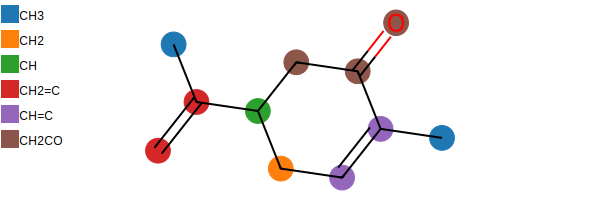

In [8]:
from IPython.display import SVG

svg = carvone.unifac.draw(width=600)

SVG(svg)

You can save the figure by doing:

In [9]:
with open("figure.svg", "w") as f:
    f.write(svg)

Check the full documentation of the draw funcion:

In [10]:
carvone.unifac.draw?

Signature:
carvone.unifac.draw(
    title: str = '',
    width: float = 400,
    height: float = 200,
    title_font_size: float = 12,
    legend_font_size: float = 12,
    font: str = 'Helvetica',
) -> Union[str, List[str]]
Docstring:
Create a svg representation of the fragmentation result.

Parameters
----------
title : str, optional
    Graph title, by default ""
width : int, optional
    Graph width, by default 400
height : int, optional
    Graph height, by default 200
title_font_size : int, optional
    Font size of graph's title, by default 12
legend_font_size : int, optional
    Legend font size, by default 12
font : str, optional
    Text font, by default "Helvetica"

Returns
-------
Union[str, List[str]]
    SVG of the fragmentation solution/s.
File:      ~/code/ugropy/ugropy/core/fragmentation_object.py
Type:      method

#### WARNING

For the UNIFAC, and PSRK groups the aldehyde group is change to HCO according
to the discussion: https://github.com/ClapeyronThermo/Clapeyron.jl/issues/225

This is more consistent with the ether groups and formate group.